<a href="https://colab.research.google.com/github/harishkumar77/ML_20BRS1231/blob/main/20BRS1231_MLLAB_11_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas  as pd
import numpy as np

In [68]:
data = pd.read_csv('/content/bank.csv')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [69]:
data['marital'].replace({'single':0,'married':0,'divorced':-1}, inplace = True)
data['default'].replace({'yes':1,'no':0}, inplace = True)
data['housing'].replace({'yes':1,'no':0}, inplace = True)
data['loan'].replace({'yes':1,'no':0}, inplace = True)
data['contact'].replace({'telephone':1,'unknown':0,'cellular':-1}, inplace = True)
data['poutcome'].replace({'success':1,'unknown':-1,'failure':0,'other':2}, inplace = True)
data['deposit'].replace({'yes':1,'no':0}, inplace = True)
data['education'].replace({'unknown':-1,'primary':1,'secondary':2,'tertiary':3}, inplace = True)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,0,2,0,2343,1,0,0,5,may,1042,1,-1,0,-1,1
1,56,admin.,0,2,0,45,0,0,0,5,may,1467,1,-1,0,-1,1
2,41,technician,0,2,0,1270,1,0,0,5,may,1389,1,-1,0,-1,1
3,55,services,0,2,0,2476,1,0,0,5,may,579,1,-1,0,-1,1
4,54,admin.,0,3,0,184,0,0,0,5,may,673,2,-1,0,-1,1


In [70]:
data.insert(0, 'ID', range(1, 1 + len(data)))

In [71]:
data.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,0,2,0,2343,1,0,0,5,may,1042,1,-1,0,-1,1
1,2,56,admin.,0,2,0,45,0,0,0,5,may,1467,1,-1,0,-1,1
2,3,41,technician,0,2,0,1270,1,0,0,5,may,1389,1,-1,0,-1,1
3,4,55,services,0,2,0,2476,1,0,0,5,may,579,1,-1,0,-1,1
4,5,54,admin.,0,3,0,184,0,0,0,5,may,673,2,-1,0,-1,1


In [72]:
data = data.drop(['job'],axis='columns')

In [73]:
data = data.drop(['month'],axis='columns')

In [74]:
data.head(5)

,ID,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,0,2,0,2343,1,0,0,5,1042,1,-1,0,-1,1
1,2,56,0,2,0,45,0,0,0,5,1467,1,-1,0,-1,1
2,3,41,0,2,0,1270,1,0,0,5,1389,1,-1,0,-1,1
3,4,55,0,2,0,2476,1,0,0,5,579,1,-1,0,-1,1
4,5,54,0,3,0,184,0,0,0,5,673,2,-1,0,-1,1


In [75]:
X = data.drop('deposit',axis=1) # Independet variable
y = data['deposit'] # dependent variable

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [78]:
X_train.describe()

,ID,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome
count,7813.000000,7813.00000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,5570.646231,41.34289,-0.115705,2.063740,0.015999,1524.629976,0.472546,0.130680,-0.653910,15.702163,370.278382,2.476130,51.757456,0.851146,-0.549597
std,3199.114965,12.03444,0.319891,0.933411,0.125479,3271.687955,0.499278,0.337071,0.605506,8.462123,347.032078,2.676173,108.664348,2.336510,0.856441
min,1.000000,18.00000,-1.000000,-1.000000,0.000000,-6847.000000,0.000000,0.000000,-1.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,-1.000000
25%,2812.000000,32.00000,0.000000,2.000000,0.000000,123.000000,0.000000,0.000000,-1.000000,8.000000,139.000000,1.000000,-1.000000,0.000000,-1.000000
50%,5562.000000,39.00000,0.000000,2.000000,0.000000,561.000000,0.000000,0.000000,-1.000000,16.000000,253.000000,2.000000,-1.000000,0.000000,-1.000000
75%,8341.000000,49.00000,0.000000,3.000000,0.000000,1696.000000,1.000000,0.000000,0.000000,22.000000,492.000000,3.000000,48.000000,1.000000,0.000000
max,11162.000000,93.00000,0.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,842.000000,58.000000,2.000000


In [79]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [80]:
# Multi MLP Generator
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,90,20)
Layer2 = range(10,90,20)
LayersComb = len(Layer1)*len(Layer2)
Step=0
score=0

for i in Layer1 :
  for j in Layer2 :
    mlp = MLPRegressor(hidden_layer_sizes=(i,j),activation="logistic" ,random_state=1, max_iter=2000).fit(X_train, Y_train)
    Y_pred_train = mlp.predict(X_train).round()
    training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
    Y_pred_test = mlp.predict(X_test).round()
    acc_score = accuracy_score(Y_test,Y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Layer2 = j
        best_Step = Step
    
    print('Step ', Step, ' of ', LayersComb, ' Layer1: ', i, ' Layer2: ', j)    
    print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1, ' Best Layer2: ', best_Layer2, ' do Step:', best_Step)

Step  1  of  16  Layer1:  10  Layer2:  10
Best Accuracy Score 0.9457  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  2  of  16  Layer1:  10  Layer2:  30
Best Accuracy Score 0.9463  Best Layer1:  10  Best Layer2:  30  do Step: 2
Step  3  of  16  Layer1:  10  Layer2:  50
Best Accuracy Score 0.9504  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  4  of  16  Layer1:  10  Layer2:  70
Best Accuracy Score 0.9504  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  5  of  16  Layer1:  30  Layer2:  10
Best Accuracy Score 0.9504  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  6  of  16  Layer1:  30  Layer2:  30
Best Accuracy Score 0.9504  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  7  of  16  Layer1:  30  Layer2:  50
Best Accuracy Score 0.9504  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  8  of  16  Layer1:  30  Layer2:  70
Best Accuracy Score 0.9504  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  9  of  16  Layer1:  50  Layer2:  10
Best Accuracy Score 0.

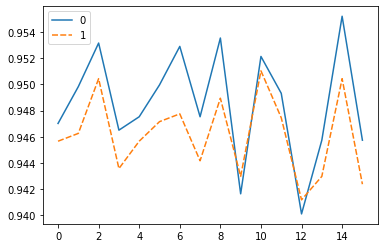

In [81]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [82]:
mlp_selected = MLPRegressor(hidden_layer_sizes=(70,70),activation="logistic" ,random_state=1, max_iter=2000)
mlp_selected.fit(X_test, Y_test)

MLPRegressor(activation='logistic', hidden_layer_sizes=(70, 70), max_iter=2000,
             random_state=1)

In [83]:
Y_pred_train = mlp_selected.predict(X_train).round()
training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(X_test).round()
acc_score = accuracy_score(Y_test,Y_pred_test)
testing_accuracy.append(acc_score)

In [84]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1770
           1       0.88      0.98      0.93      1579

    accuracy                           0.93      3349
   macro avg       0.93      0.93      0.93      3349
weighted avg       0.94      0.93      0.93      3349

